<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

<!-- Images names -->
<!-- seaborn.png plotly.png  -->

# Compare Seaborn and Plotly Methods to build visualisations
<table width="100%">
<tr>
    <td>
        <img src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/viz-images/seaborn.png">        
        <a align="left"; href="https://seaborn.pydata.org/">Seaborn</a>
    </td>
    <td>
        <img src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/viz-images/plotly.png">
        <a align="left"; href="https://plotly.com/python/">Plotly</a>
    </td>
    </tr>
</table>

# Import libraries

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# %matplotlib notebook will lead to interactive plots embedded within the notebook
# (Jupyter Lab does support interactive matplotlib through the jupyter-matplotlib extension.)
# %matplotlib inline will lead to static images of your plot embedded in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [3]:
customer_acquisition_df = pd.read_csv("https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/CreditCard/Customer%20Acqusition.csv")
repayment_df = pd.read_csv("https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/CreditCard/Repayment.csv")
spend_df = pd.read_csv("https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/CreditCard/spend.csv")

# Seaborn

[Examples for Seaborn are from Seaborn Documentation. See more details here](https://seaborn.pydata.org/introduction.html)

## Scatter plot

In [4]:
sns.__version__

'0.9.0'

In [5]:
# Apply the darkgrid style
sns.set_style('darkgrid')

# Load an example dataset
tips_df = sns.load_dataset("tips")

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn has a collection of plotting functions - the documentation here describes them clearly

https://seaborn.pydata.org/tutorial/function_overview.html

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

In [7]:
# TODO: Create a visualization - e.g. relplot is a single function for different types of relational plot



## Statistical estimation and error bars

Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:

In [6]:
fmri_df = sns.load_dataset("fmri")

fmri_df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [7]:
# TODO: sns replot of fmri_df, kind is line, x timepoint, y signal, split by region


## Specialized plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through catplot(). These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a “swarm” plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap

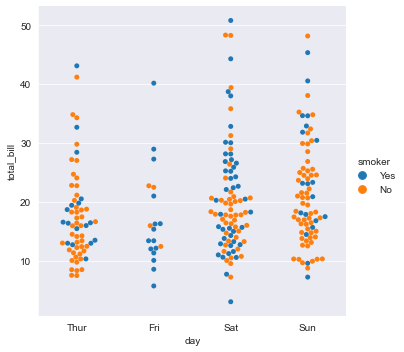

In [8]:
sns.catplot(data=tips_df,
            kind="swarm",
            x="day",
            y="total_bill",
            hue="smoker")

plt.show()

## Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from

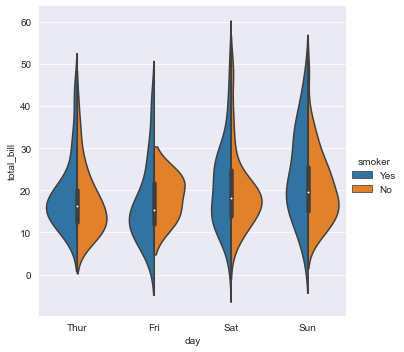

In [9]:
sns.catplot(data=tips_df,
            kind="violin",
            x="day",
            y="total_bill",
            hue="smoker",
            split=True)

plt.show()

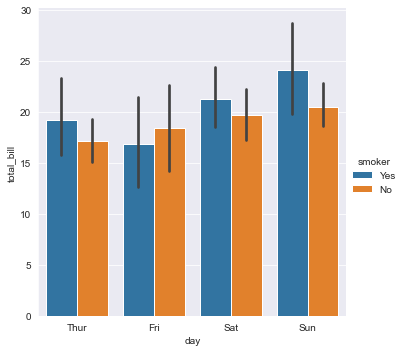

In [10]:
sns.catplot(data=tips_df,
            kind="bar",
            x="day",
            y="total_bill",
            hue="smoker")

plt.show()

## Pair Plot

In [8]:
penguins_df = sns.load_dataset("penguins")

# TODO: pairplot for penguins, colored by species

## Pair Plot for Customer Acquisition

In [12]:
customer_acquisition_df = customer_acquisition_df.drop("No", axis=1)
customer_acquisition_df.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [9]:
# TODO: pairplot of the entire dataframe colored by Product

# Plotly

Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

**Notice that Plotly allows to interact and zoom-in-out**

[Documentation here](https://plotly.com/python/)

## Scatter plot

In [11]:
import plotly.express as px

iris_df = px.data.iris()


# TODO: plotly scatter plot for sepal_width Vs sepal_length colored by species


## Line

In [12]:
spend_df["Month"] = pd.to_datetime(spend_df["Month"])

send_by_month_df = spend_df[["Month", "Amount"]].groupby("Month").sum().round()
send_by_month_df = send_by_month_df[4:]
send_by_month_df = send_by_month_df.reset_index()

In [13]:
send_by_month_df.head()

,Month,Amount
0,2004-02-05,6194028.0
1,2004-03-19,3250046.0
2,2004-04-06,3158459.0
3,2004-04-25,3429159.0
4,2004-05-05,3045549.0


In [15]:
# TODO: plotly lineplot of month Vs amount

## Multiple lines

In [21]:
spend_df["Month"] = pd.to_datetime(spend_df["Month"])

send_type_by_month_df = spend_df[["Month", "Type", "Amount"]].groupby(["Month", "Type"]).sum().round()
send_type_by_month_df = send_type_by_month_df[4:]
send_type_by_month_df = send_type_by_month_df.reset_index()

In [22]:
send_type_by_month_df.head()

,Month,Type,Amount
0,2004-01-03,CLOTHES,899928.0
1,2004-01-03,FOOD,3705949.0
2,2004-01-03,JEWELLERY,710395.0
3,2004-01-03,MOVIE TICKET,368574.0
4,2004-01-03,PETRO,3921396.0


In [23]:
fig = px.line(data_frame=send_type_by_month_df,
              x="Month",
              y="Amount",
              color="Type")
fig.show()

## Too much noise... let's only look at some categories

In [24]:
send_type_by_month_df = send_type_by_month_df[send_type_by_month_df["Type"].isin(["CLOTHES", "FOOD", "AUTO"])]

fig = px.line(data_frame=send_type_by_month_df,
              x="Month",
              y="Amount",
              color="Type")
fig.show()

## Pie chart

In [25]:
# Create bins for the Credit Limit
customer_acquisition_df["Age_Bin"] = pd.qcut(customer_acquisition_df["Age"], 
                                             q=4, 
                                             labels=["<34ys", "<47ys", "<60ys", "<79ys"])

customer_acquisition_df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Age_Bin
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,<79ys
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,<79ys
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,<47ys
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt,<60ys
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary,<60ys


In [26]:
fig = px.pie(data_frame=customer_acquisition_df,
             values="Limit",
             names="City",
             title="Limit Spent by City")
fig.show()

### Change the colors schemes

In [27]:
fig = px.pie(data_frame=customer_acquisition_df,
             values="Limit",
             names="City",
             title="Limit Spent by City",
             color_discrete_sequence=px.colors.sequential.RdBu
             )
fig.show()

### Add more information

In [28]:
customer_acquisition_df.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Age_Bin
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,<79ys


In [29]:
fig = px.pie(data_frame=customer_acquisition_df,
             values="Limit",
             names="City",
             title="Limit Spent by City",
             hover_data=["Product"],
             color_discrete_sequence=px.colors.sequential.RdBu
             )
fig.update_traces(textposition="inside",
                  textinfo="percent+label")
fig.show()

### Heatmap

In [30]:
customer_acquisition_df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Age_Bin
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,<79ys
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,<79ys
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,<47ys
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt,<60ys
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary,<60ys


In [31]:
fig = px.density_heatmap(data_frame=customer_acquisition_df,
                         x="City",
                         y="Product")
fig.show()

In [32]:
fig = px.density_heatmap(data_frame=customer_acquisition_df,
                         x="City",
                         y="Age")
fig.show()

In [30]:
spend_df.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [31]:
fig = px.density_heatmap(data_frame=spend_df,
                         x="Type",
                         y="Amount")
fig.show()

## For more plots check in Plotly documentation [here](https://plotly.com/python/plotly-express/)